In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import os

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import math

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Preprocessing and EDA

In [3]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='Count'>

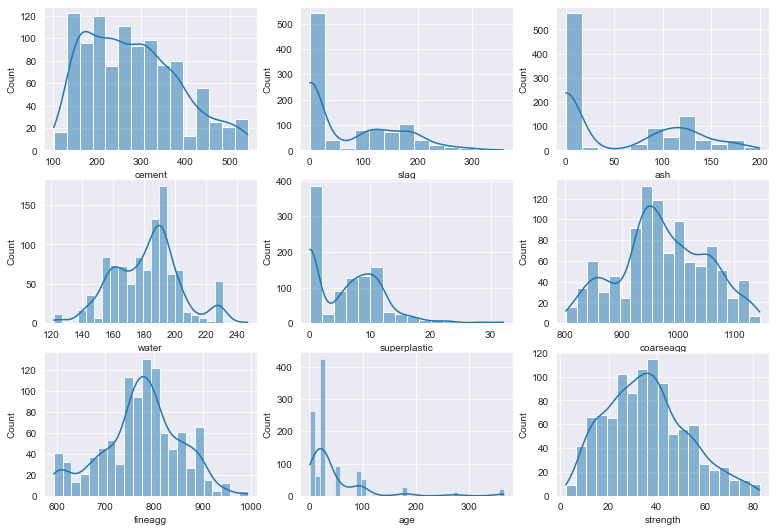

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 9))
sns.histplot(x='cement', data=df, kde=True, ax=ax[0][0])
sns.histplot(x='slag', data=df, kde=True, ax=ax[0][1])
sns.histplot(x='ash', data=df, kde=True, ax=ax[0][2])
sns.histplot(x='water', data=df, kde=True, ax=ax[1][0])
sns.histplot(x='superplastic', data=df, kde=True, ax=ax[1][1])
sns.histplot(x='coarseagg', data=df, kde=True, ax=ax[1][2])
sns.histplot(x='fineagg', data=df, kde=True, ax=ax[2][0])
sns.histplot(x='age', data=df, kde=True, ax=ax[2][1])
sns.histplot(x='strength', data=df, kde=True, ax=ax[2][2])

In [6]:
df['age'].unique()

array([ 28,  14,  90,   7,  56,   3, 100,  91, 180, 365, 270, 360, 120,
         1], dtype=int64)

<AxesSubplot:>

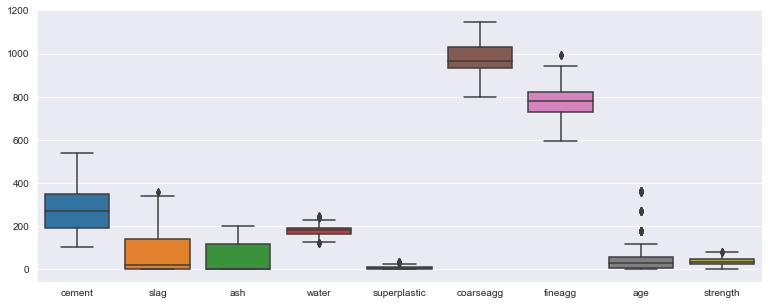

In [7]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=df)

In [8]:
q = df['age'].quantile(0.98)
df_cleaned = df[df['age'] < q]

In [9]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

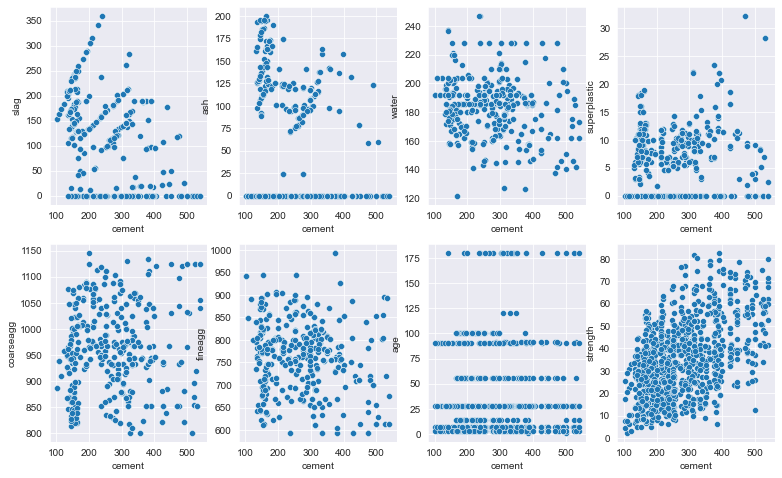

In [10]:
xaxis='cement'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

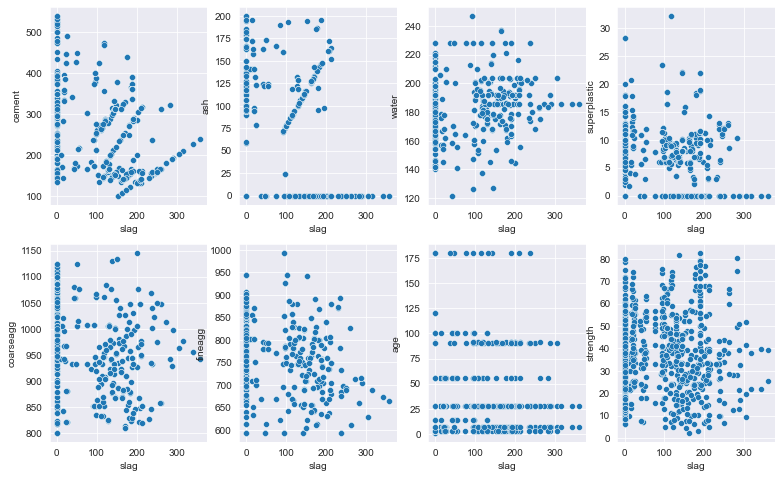

In [11]:
xaxis='slag'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

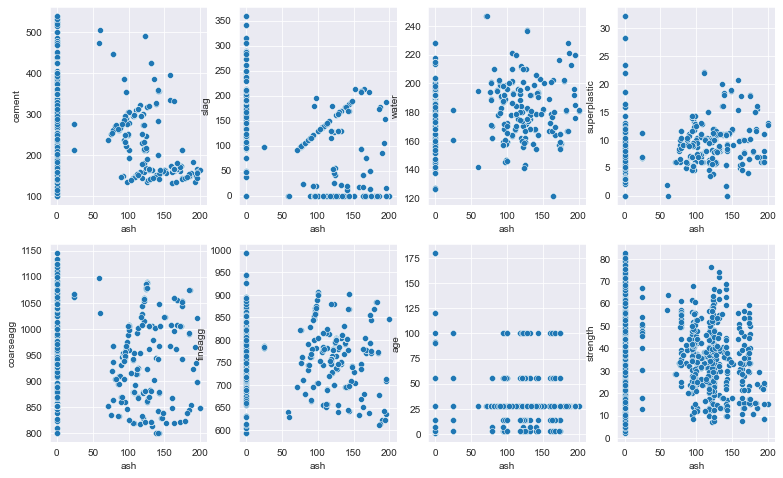

In [12]:
xaxis='ash'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

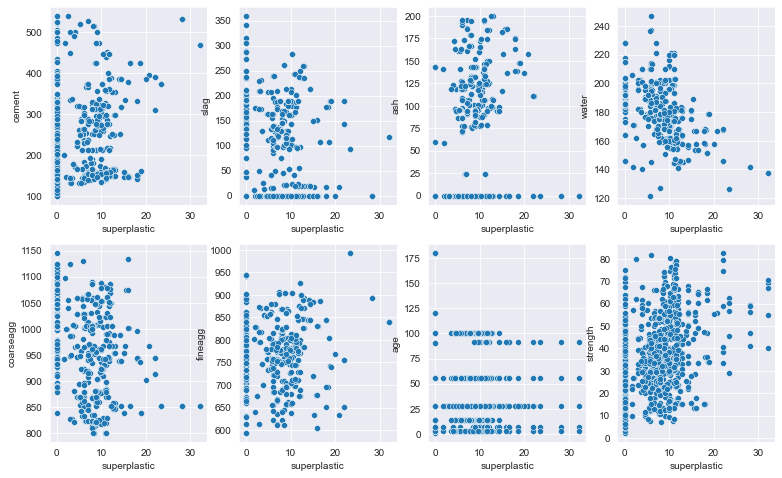

In [13]:
xaxis='superplastic'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

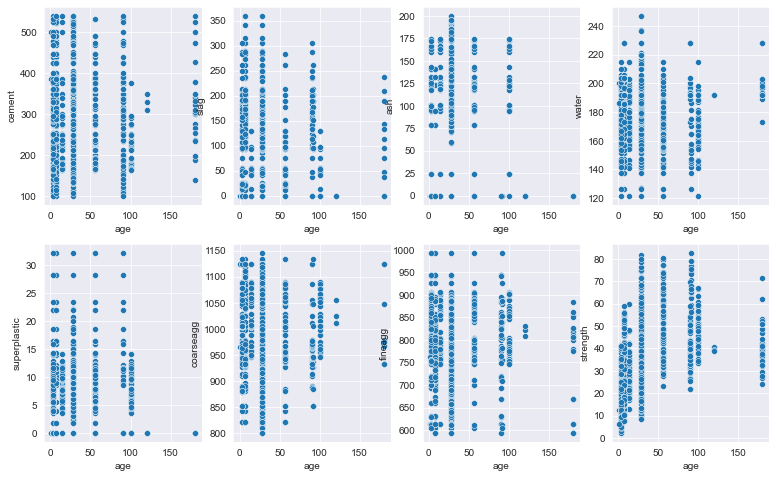

In [14]:
xaxis='age'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

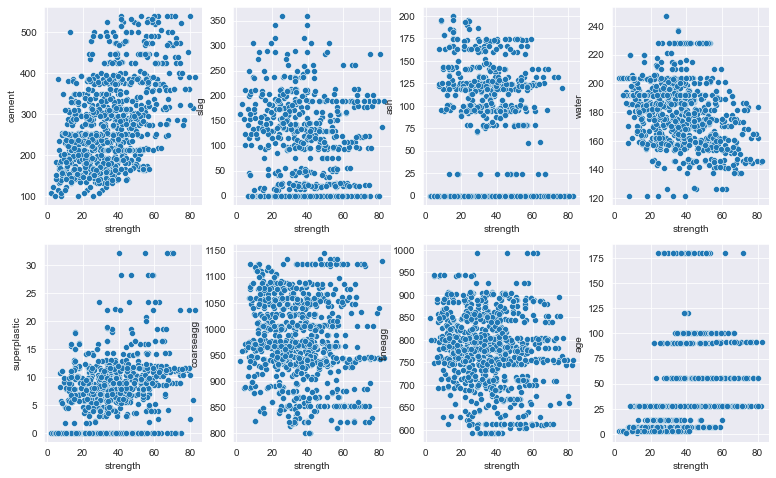

In [15]:
xaxis='strength'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(13, 8))
lst = df.columns.drop(xaxis)
for ind, col in enumerate(lst):
    sns.scatterplot(x=xaxis, y=col, data=df_cleaned, ax=ax[int(ind/4)][ind%4])

<AxesSubplot:>

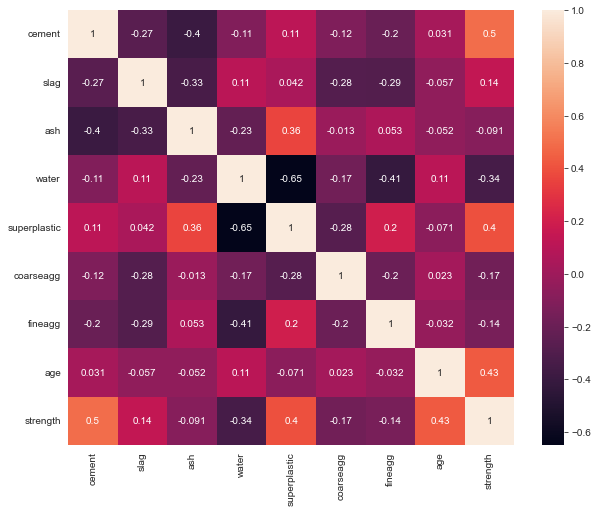

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True)

### Clustering

<AxesSubplot:>

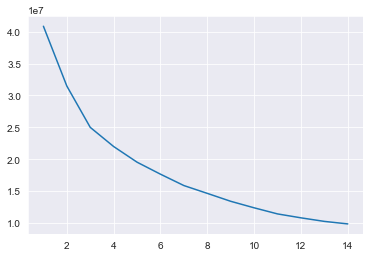

In [17]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=124)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
sns.lineplot(x=range(1,15), y=wcss)

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=124)
y = kmeans.fit_predict(df)

In [19]:
y = y.reshape(-1, 1)
y.shape

(1030, 1)

In [20]:
df['cluster'] = y

In [21]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [22]:
# separating dataset based on the cluster formed by kmeans
df_cls0 = df[df['cluster']==0]
df_cls1 = df[df['cluster']==1]
df_cls2 = df[df['cluster']==2]

### Models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import math

In [24]:
# Function to Calculate scores and prediction of 4 different models.
def modelScores(xtrain, xtest, ytrain, ytest):
    ypred = []
    lin_reg = LinearRegression()
    xgb = xg.XGBRegressor()
    dec_tree = DecisionTreeRegressor()
    ran_forest = RandomForestRegressor()
    
    lin_reg.fit(xtrain, ytrain)
    ypred.append(lin_reg.predict(xtest))
        
    dec_tree.fit(xtrain, ytrain)
    ypred.append(dec_tree.predict(xtest))
    
    ran_forest.fit(xtrain, ytrain)
    ypred.append(ran_forest.predict(xtest))
    
    xgb.fit(xtrain, ytrain)
    ypred.append(xgb.predict(xtest))
    
    models = ['LinearRegression', 'DecisionTree', 'RandomForest', 'XGBoost']
    dic = {'Model' : models,
          'RMSE' : [math.sqrt(mse(ytest, i)) for i in ypred],
          'R2 Score' : [r2_score(ytest, i) for i in ypred]}
    scores = pd.DataFrame(dic)
    return (scores, ypred)

#### Cluster 0

In [25]:
# Finding the scores and prediction for cluster 0
x = df_cls0.drop('strength', axis=1)
y = df_cls0['strength']
xtrain_cls0, xtest_cls0, ytrain_cls0, ytest_cls0 = train_test_split(x, y, test_size=0.2, random_state=5)

In [26]:
score, pred_cls0 = modelScores(xtrain_cls0, xtest_cls0, ytrain_cls0, ytest_cls0)
score

,Model,RMSE,R2 Score
0,LinearRegression,9.887366,0.661366
1,DecisionTree,9.623315,0.679212
2,RandomForest,6.720082,0.843571
3,XGBoost,5.316627,0.902087


#### Cluster 1

In [27]:
# Finding the scores and prediction for cluster 1
x = df_cls1.drop('strength', axis=1)
y = df_cls1['strength']
xtrain_cls1, xtest_cls1, ytrain_cls1, ytest_cls1 = train_test_split(x, y, test_size=0.2, random_state=5)

In [28]:
score, pred_cls1 = modelScores(xtrain_cls1, xtest_cls1, ytrain_cls1, ytest_cls1)
score

,Model,RMSE,R2 Score
0,LinearRegression,6.701817,0.781590
1,DecisionTree,5.023686,0.877275
2,RandomForest,4.138717,0.916705
3,XGBoost,3.235756,0.949086


#### Cluster 2

In [29]:
# Finding the scores and prediction for cluster 2
x = df_cls2.drop('strength', axis=1)
y = df_cls2['strength']
xtrain_cls2, xtest_cls2, ytrain_cls2, ytest_cls2 = train_test_split(x, y, test_size=0.2, random_state=5)

In [30]:
score, pred_cls2 = modelScores(xtrain_cls2, xtest_cls2, ytrain_cls2, ytest_cls2)
score

,Model,RMSE,R2 Score
0,LinearRegression,11.001037,0.552541
1,DecisionTree,6.788390,0.829620
2,RandomForest,5.680469,0.880696
3,XGBoost,4.382909,0.928975


In [31]:
# Predictions of all the models. The data is arranged such that predicition of Cluster-0 is first, 
# then Cluster-1 and finally Cluster-2.
dic = {'LinearRegression' : np.concatenate((pred_cls0[0], pred_cls1[0], pred_cls2[0])),
       'DecisionTree' : np.concatenate((pred_cls0[1], pred_cls1[1], pred_cls2[1])),
       'RandomForest' : np.concatenate((pred_cls0[2], pred_cls1[2], pred_cls2[2])),
       'XGBoost' : np.concatenate((pred_cls0[3], pred_cls1[3], pred_cls2[3]))
      }
predictions = pd.DataFrame(dic)

In [32]:
predictions

,LinearRegression,DecisionTree,RandomForest,XGBoost
0,43.878905,52.43,50.077600,52.299469
1,38.052464,46.25,44.998700,47.098209
2,33.755659,23.52,23.330000,18.595531
3,49.010331,76.24,45.407700,45.899746
4,24.966389,47.71,42.778400,39.476486
...,...,...,...,...
201,20.829604,14.99,17.632200,19.107899
202,49.101905,57.60,57.339657,57.580894
203,59.906067,79.40,65.487300,75.514381
204,52.594173,60.29,60.406500,60.320145


In [33]:
# Concatenating the ytest of all the cluster
a = pd.concat((ytest_cls0, ytest_cls1, ytest_cls2), axis=0)

In [34]:
for i in predictions.columns:
    print(f"{i} : {math.sqrt(mse(a, predictions[i]))}")

LinearRegression : 9.360840685422886
DecisionTree : 7.410130120184007
RandomForest : 5.619402515553362
XGBoost : 4.399998670747218


In [35]:
dic = {'Model' : predictions.columns,
      'RMSE_clustered' : [math.sqrt(mse(a, predictions[i])) for i in predictions.columns],
      'R2_Score_clusterd' : [r2_score(a, predictions[i]) for i in predictions.columns]}
scores_clustered = pd.DataFrame(dic)
scores_clustered

,Model,RMSE_clustered,R2_Score_clusterd
0,LinearRegression,9.360841,0.683148
1,DecisionTree,7.410130,0.801446
2,RandomForest,5.619403,0.885816
3,XGBoost,4.399999,0.929995


#### Finding the scores of dataeste without Clustering

In [36]:
x = df.drop('strength', axis=1)
y = df['strength']

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=15)

In [38]:
score_whole, pred = modelScores(xtrain, xtest, ytrain, ytest)
score_whole

,Model,RMSE,R2 Score
0,LinearRegression,10.581201,0.569613
1,DecisionTree,6.117009,0.856164
2,RandomForest,5.174418,0.897077
3,XGBoost,5.125819,0.899001


<AxesSubplot:xlabel='Model', ylabel='RMSE'>

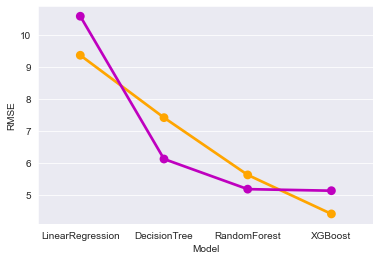

In [41]:
sns.pointplot(x='Model', y='RMSE_clustered', data=scores_clustered, color='orange')
sns.pointplot(x='Model', y='RMSE', data=score_whole, color='m')

<AxesSubplot:xlabel='Model', ylabel='R2 Score'>

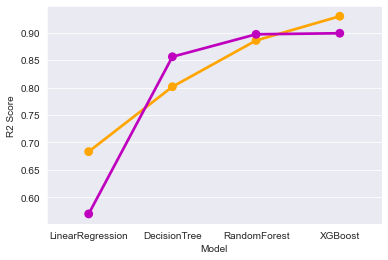

In [42]:
sns.pointplot(x='Model', y='R2_Score_clusterd', data=scores_clustered, color='orange')
sns.pointplot(x='Model', y='R2 Score', data=score_whole, color='m')